In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(10)

# Resampling

Resampling in statistics means to repeatedly sample values from observed data, with a general goal of assessing random variability in a statistic. To understand what resampling is, let we look at the housing price in Amsterdam data distribution (histogram) below.

In [2]:
house_price = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Additional-Materials/main/HousingPrices-Amsterdam-August-2021.csv')
house_price.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


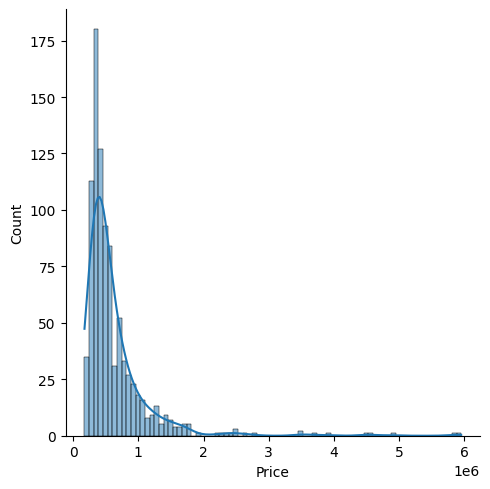

In [3]:
sns.displot(house_price.Price, kde=True, label='Housing Price in Amsterdam')

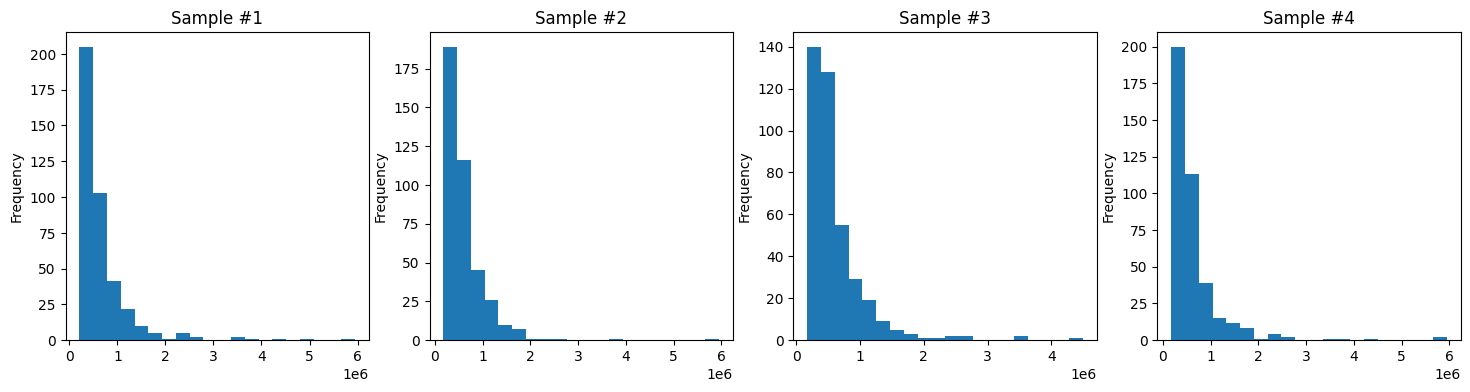

In [4]:
fig,ax = plt.subplots(ncols=4, figsize = (18,4))
for i in range(4):
  house_price.Price.sample(400).plot(kind='hist',bins=20,ax=ax[i])
  ax[i].set_title('Sample #{}'.format(i+1))

We take 100 samples randomly from the housing price data and we did it 4 times. The visualization show that their distribution look the same. It happend simply because of randomness.

# Confidence Interval

## **Case**: Determining New Warehouse Capacity

Your company is planning to build a new warehouse to improve the delivery service for the increasing number of shipments. Can you determine the appropriate capacity for the warehouse? (assuming that the warehouse capacity is determined by the number of goods that are shipped out each day and there are no goods that remain in the warehouse/inflow rate = outflow rate).

In [5]:
data = pd.read_excel('https://github.com/fahmimnalfrzki/Additional-Materials/blob/main/online_retail_data.xlsx?raw=true').drop(columns='Unnamed: 0').sort_values('InvoiceDate',ascending=True).reset_index(drop=True)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom
1,536373,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-01 09:02:00,2.10,17850.0,United Kingdom
2,536398,22752,SET 7 BABUSHKA NESTING BOXES,6,2010-12-01 10:52:00,8.50,13448.0,United Kingdom
3,536401,85150,LADIES & GENTLEMEN METAL SIGN,1,2010-12-01 11:21:00,2.55,15862.0,United Kingdom
4,536404,20727,LUNCH BAG BLACK SKULL.,10,2010-12-01 11:29:00,1.65,16218.0,United Kingdom


We assume in our data that, each transaction has successfully shipped.

Extract date from `InvoiceDate`

In [6]:
data['Date'] = data['InvoiceDate'].dt.date
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,2010-12-01
1,536373,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-01 09:02:00,2.10,17850.0,United Kingdom,2010-12-01
2,536398,22752,SET 7 BABUSHKA NESTING BOXES,6,2010-12-01 10:52:00,8.50,13448.0,United Kingdom,2010-12-01
3,536401,85150,LADIES & GENTLEMEN METAL SIGN,1,2010-12-01 11:21:00,2.55,15862.0,United Kingdom,2010-12-01
4,536404,20727,LUNCH BAG BLACK SKULL.,10,2010-12-01 11:29:00,1.65,16218.0,United Kingdom,2010-12-01


In [7]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,10000.000000,10000,10000.000000,7499.000000
mean,9.719000,2011-07-02 11:22:17.981999872,4.975422,15275.863582
min,-1131.000000,2010-12-01 08:35:00,0.000000,12347.000000
25%,1.000000,2011-03-25 10:33:30,1.250000,13930.500000
50%,3.000000,2011-07-17 14:59:30,2.080000,15144.000000
75%,12.000000,2011-10-17 16:53:00,4.130000,16779.000000
max,1152.000000,2011-12-09 12:20:00,5522.140000,18287.000000
std,37.130479,NaN,63.828081,1708.921268


There are minus values in the `Quantity` and zeros in `UnitPrice`, which is not good, so we remove them.

In [8]:
data = data[(data['Quantity']>0) & (data['UnitPrice']>0)]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,2010-12-01
1,536373,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-01 09:02:00,2.10,17850.0,United Kingdom,2010-12-01
2,536398,22752,SET 7 BABUSHKA NESTING BOXES,6,2010-12-01 10:52:00,8.50,13448.0,United Kingdom,2010-12-01
3,536401,85150,LADIES & GENTLEMEN METAL SIGN,1,2010-12-01 11:21:00,2.55,15862.0,United Kingdom,2010-12-01
4,536404,20727,LUNCH BAG BLACK SKULL.,10,2010-12-01 11:29:00,1.65,16218.0,United Kingdom,2010-12-01


Grouping the data by date and aggregate with `sum` and only involve two columns which are `Date` and `Quantity`.

In [9]:
stock = data[['Date','Quantity']].groupby('Date').sum()
stock.head()

,Quantity
Date,
2010-12-01,364
2010-12-02,487
2010-12-03,244
2010-12-05,212
2010-12-06,292


In [10]:
print('Average =',stock['Quantity'].mean())
print('Minimum =',stock['Quantity'].min())
print('Maximum =',stock['Quantity'].max())

Average = 332.95409836065573
Minimum = 15
Maximum = 1463


In the past year, the number of goods coming out of the warehouse ranged from 15 to 1463 items per day, with an average of 336 items per day.

### **Calculate Confidence Interval**

*Assume that population data is normally distributed*

`stats.norm.interval(conf_level,loc=average,scale="The_width_of th_ distribution_from_the_average")`

The width of the distribution from the average =  `std/sqrt(N)`

**If your data is not normally distributed, you can use this formula to calculate the confidence interval.**

```
Upper = Median + 1.7 * (1.25*IQR / 1.35*sqrt(N))

Lower = Median - 1.7 * (1.25*IQR / 1.35*sqrt(N))
```

Note: This is often used in notched box plots, a useful data visualization for non-normal data. If the notches of two medians do not overlap, the medians are, approximately, significantly different at about a 95% confidence level.

```
Reference:

[1] McGill, R., J. W. Tukey, and W. A. Larsen. "Variations of Boxplots." The American Statistician. Vol. 32, No. 1, 1978, pp. 12–16.
```

In [32]:
import math

In [36]:
median = stock['Quantity'].median()
Q1 = stock['Quantity'].quantile(0.25)
Q3 = stock['Quantity'].quantile(0.75)

IQR = Q3-Q1
data_length = len(stock)

ub = median + 1.7 * (1.25 * IQR/(1.35*math.sqrt(data_length)))
lb = median - 1.7 * (1.25 * IQR/(1.35*math.sqrt(data_length)))

print(f'Upper Bound: {ub}')
print(f'Lower Bound: {lb}')

Upper Bound: 275.1808365331843
Lower Bound: 232.81916346681572


The estimated number of goods that can be shipped out each day ranges from 307 to 364 items.
Recommendation: Build/select a warehouse with a capacity of at least 364 items or 400 items.

# Hypothesis Test

## Single Sample

 **One-Sided** *For Example*

### **Case**: Student Council (OSIS) President Election in Hacktiv8 High School

Hacktiv8 High School is conducting an election for the Student Council President. There are three candidates competing in this event. The voting is attended by 250 students from grades 10 to 12 and 50 teachers and staff.

Later, during the vote-counting process, which is estimated to take 3 hours, the Class Representative Council (MPK) is conducting a quick count. The Class Representative Council conducted a survey among 20 students from various classes (grades 10 to 12).

Based on the age, the average age of the voters is 20.3 years. And from the survey results, the data of the ages of these 20 individuals are as follows:

In [12]:
survey = pd.DataFrame({'Age': [15,14,17,17,16,14,19,16,15,18,16,19,17,14,17,14,16,14,14,19]})
survey

,Age
0,15
1,14
2,17
3,17
4,16
5,14
6,19
7,16
8,15
9,18


Is the above data valid and can it be used as a reference for a quick count? (20 data represents 300 data).

We will perform the one sample - hypothesis test

In [13]:
survey.Age.mean()

16.05

In average, 20 voters are 16 years old, it is below the total voters average age. Moreover, if we compare the means, they are different. But, Is it significantly different in statistics?

#### Define the Hypothesis

**H0**:`Average of 20 voters ages <= Average of 300 voters`

**H1**: `Average of 20 voters ages > Average of 300 voters`

**OR**

**H0**:`Average of 20 voters ages <= 20,3`

**H1**: `Average of 20 voters ages > 20,3`

In [14]:
t_stat,p_val = stats.ttest_1samp(survey.Age, 20.3)
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 1.0024790759067526e-09
t-statistics: -10.611917704868308


Based on p-value that is less than critical value, 0.05, so the H0 is rejected. So, 16 and 20.3 are significantly different in statistics.

Futhermore, we conclude based on this analysis, 20-voters survey data is invalid and cannot be used for quick count.

About this result, we've already given a hint that the survey conducted only among 20 students from various classes (grades 10 to 12), it didn't invlove the teachers and staffs.

## Two-Sample Independent Test

### **Case**: Which One Better? Sales in Germany or United Kingdom?

You are requested to analyze the sales performance in Germany and UK. The sales referred to are the monthly revenue from both countries. The purpose of this analysis is to determine the location for a new branch (either in Germany or UK).

In [15]:
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year
data['Revenue'] = data['Quantity']*data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,month,year,Revenue
0,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,2010-12-01,12,2010,17.85
1,536373,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-01 09:02:00,2.10,17850.0,United Kingdom,2010-12-01,12,2010,12.60
2,536398,22752,SET 7 BABUSHKA NESTING BOXES,6,2010-12-01 10:52:00,8.50,13448.0,United Kingdom,2010-12-01,12,2010,51.00
3,536401,85150,LADIES & GENTLEMEN METAL SIGN,1,2010-12-01 11:21:00,2.55,15862.0,United Kingdom,2010-12-01,12,2010,2.55
4,536404,20727,LUNCH BAG BLACK SKULL.,10,2010-12-01 11:29:00,1.65,16218.0,United Kingdom,2010-12-01,12,2010,16.50


In [16]:
#Monthly Revenue
UK = data[data['Country']=='United Kingdom'][['year','month','Revenue']].groupby(['year','month']).sum()
DE = data[data['Country']=='Germany'][['year','month','Revenue']].groupby(['year','month']).sum()

In [17]:
print('Average Monthly Revenue of UK =',UK['Revenue'].mean())
print('Average Monthly Revenue of Germany =',DE['Revenue'].mean())

Average Monthly Revenue of UK = 12411.16153846154
Average Monthly Revenue of Germany = 296.1284615384615


Penjualan UK jauh lebih besar dari Jerman. Artinya performa penjualan UK lebih baik di satu tahun ke belakang. Karena ingin menguji perbedaan signifikan "data populasi" antara penjualan di UK dan Jerman dari data sampel setahun kebelakang

**H0**: Rata-rata pendapatan bulanan UK == Germany

**H1**: Rata-rata pendapatan bulanan UK != Germany

In [18]:
t_stat, p_val = stats.ttest_ind(UK['Revenue'],DE['Revenue'])
print('T-Statistic:',t_stat)
print('P-value:',p_val) #

T-Statistic: 8.88800098677858
P-value: 4.662682511359629e-09


## Paired Test (Two-Sample Dependent Test)

### **Case**: Implementation on A/B Testing on Game Version

We're dealing with the marketing division of game developer company to analyze which game version that tend to give more retention rate? Is it correct that we upgrade our game from gate 30 to gate 40 version? (Data from https://www.kaggle.com/yufengsui/mobile-games-ab-testing) We will use retention_1 data which capture the information that did the player come back and play 1 day after installing.

In [19]:
cookie_cats = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Additional-Materials/main/cookie_cats.csv')
cookie_cats

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [20]:
gate_30 = cookie_cats[cookie_cats['version']=='gate_30']['retention_1'].replace({True:1,False:0})
gate_40 = cookie_cats[cookie_cats['version']=='gate_40']['retention_1'].replace({True:1,False:0})

print('Retention rate of gate 30 version:',gate_30.sum()/gate_30.count())
print('Retention rate of gate 40 version:',gate_40.sum()/gate_40.count())

<ipython-input-20-446540e5480c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gate_30 = cookie_cats[cookie_cats['version']=='gate_30']['retention_1'].replace({True:1,False:0})
<ipython-input-20-446540e5480c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  gate_40 = cookie_cats[cookie_cats['version']=='gate_40']['retention_1'].replace({True:1,False:0})


Retention rate of gate 30 version: 0.4481879194630872
Retention rate of gate 40 version: 0.44228274967574577


In [21]:
gate_30

,retention_1
0,0
1,1
6,0
11,0
13,1
...,...
90179,1
90180,0
90182,1
90183,0


In [22]:
gate_40

,retention_1
2,1
3,0
4,1
5,1
7,0
...,...
90181,1
90184,1
90185,0
90187,1


The retention rate between those versions is slightly different. Is the difference truly the same or because of chance?

To make sure of our result, we will check using paired test two sided.

Our hypothesis on this case:

**H0: μ_gate30 = μ_gate40**

**H1: μ_gate30 != μ_gate40**

In [23]:
t_stat,p_val = stats.ttest_rel(gate_30.sample(40000),gate_40.sample(40000)) #we take 40000 sample of each data to make the size the same.
print('P-value:',p_val)

P-value: 0.08306769212953277


**Since the p-value is more than 0.05, we conclude that we fail to reject the Null Hypothesis** which means between gate 30 and 40 version is the same. We safely upgrade our game into gate 40 version.

## ANOVA

### **Case**: Are There Significantly Difference of Heart Rate Among BMI Category?

In [24]:
sleep = pd.read_csv('https://github.com/FTDS-learning-materials/phase-0/raw/main/src/sleep_dat.csv')
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [25]:
sleep['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [26]:
#Extracting heart rate data for each category

normal = sleep['Heart Rate'][(sleep['BMI Category']=='Normal') | (sleep['BMI Category']=='Normal Weight')]
overweight = sleep['Heart Rate'][sleep['BMI Category']=='Overweight']
obese = sleep['Heart Rate'][sleep['BMI Category']=='Obese']

In [27]:
print(f'Average Heart Rate of Normal Weight Group: {normal.mean():.2f}')
print(f'Average Heart Rate of Overweight Group: {overweight.mean():.2f}')
print(f'Average Heart Rate of Obese Group: {obese.mean():.2f}')

Average Heart Rate of Normal Weight Group: 68.98
Average Heart Rate of Overweight Group: 70.95
Average Heart Rate of Obese Group: 84.30


H0: There are not significantly difference of heart rate among three categories

H1: There are significantly difference of heart rate among three categories

In [28]:
res = stats.f_oneway(normal, overweight, obese)
print('P-value:',res.pvalue)

P-value: 1.318547773238438e-38


p-value less than 0.05, so that our H0 rejected, which means heart rate among normal weight, overweight, and obese are significantly different.

## Chi-Squared Test

### **Case**: 'Correlation' between Gender and Smoking Behaviour from Insurance Data

Conducting a Chi-Squared Hypothesis Test

H0: There is no relationship between Gender and Smoking Habit (Men and Women are the same).

H1: There is a relationship between Gender and Smoking Habit (Men and Women are different).


In [29]:
ins = pd.read_csv('https://github.com/fahmimnalfrzki/Dataset/raw/main/insurance.csv')
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
#Contingency Table
contingency_table = pd.crosstab(ins['sex'],ins['smoker'])
contingency_table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [31]:
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 0.006548143503580696


Critical value: 0.05

p-val = 0.0065 < critical value

H0 rejected

**Conclusion**:

There is a relationship between gender and smoking habits, where smoking is more prevalent among males compared to females.